<a href="https://colab.research.google.com/github/pratiksha806/dataAnaylis/blob/main/app_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dash pyngrok pandas plotly
!ngrok config add-authtoken 2w7X4ZqG3C6ebIz7bpcFqOCjOou_3YqmiGDjFqtBgYfqJMPp6
from google.colab import files
uploaded = files.upload()
from pyngrok import ngrok
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# Ngrok tunnel
public_url = ngrok.connect(8050)
print(f"App running at: {public_url}")

# Load dataset
df = pd.read_csv("sample_data/amazon_sales_data 2025.csv")
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%y", errors='coerce')
df["Total Sales"] = pd.to_numeric(df["Total Sales"], errors='coerce')
df = df.dropna()

# Dash App
app = Dash(__name__)
app.title = "Amazon Sales Dashboard"

app.layout = html.Div([
    html.H1("📊 Amazon Sales Dashboard", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id="category-filter",
        options=[{"label": c, "value": c} for c in sorted(df["Category"].unique())],
        value=None,
        placeholder="Select category",
        clearable=True
    ),
    dcc.Graph(id="top-products")
])

@app.callback(
    Output("top-products", "figure"),
    [Input("category-filter", "value")]
)
def update_chart(category):
    dff = df[df["Category"] == category] if category else df
    top = dff.groupby("Product")["Total Sales"].sum().nlargest(5).reset_index()
    return px.bar(top, x="Product", y="Total Sales", title="Top 5 Products")

app.run()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


Saving amazon_sales_data 2025.csv to amazon_sales_data 2025.csv
App running at: NgrokTunnel: "https://5296-34-106-77-251.ngrok-free.app" -> "http://localhost:8050"


<IPython.core.display.Javascript object>

Saving imdbEr.txt to imdbEr.txt
Total: 89527
Positive: 34739, Negative: 19033, Neutral: 35755


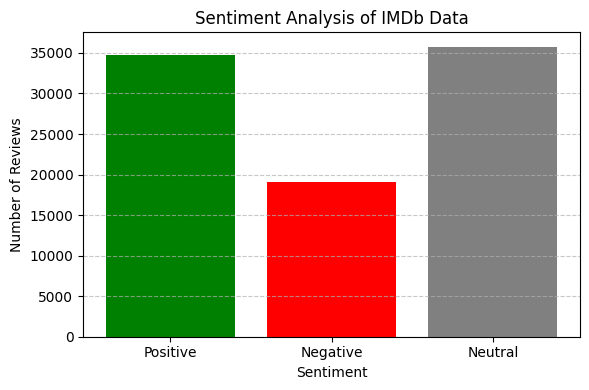

In [2]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

with open(filename, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Convert to float
sentiment_scores = [float(score.strip()) for score in lines]

# Classify sentiment
positive = sum(score > 0.05 for score in sentiment_scores)
negative = sum(score < -0.05 for score in sentiment_scores)
neutral = len(sentiment_scores) - positive - negative

print(f"Total: {len(sentiment_scores)}")
print(f"Positive: {positive}, Negative: {negative}, Neutral: {neutral}")
import matplotlib.pyplot as plt

labels = ['Positive', 'Negative', 'Neutral']
counts = [positive, negative, neutral]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['green', 'red', 'gray'])
plt.title('Sentiment Analysis of IMDb Data')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
